In [28]:
import numpy as np
import matplotlib.pyplot as plt
import HyCho_FEM as fem

In [29]:
wpe   = 5.
nuh   = 6e-3
wpa   = 0.2
wperp = 0.53
L     = 327.7


k = np.linspace(0.5, 15., 200)

omegar = np.zeros(len(k), dtype=float)
gamma  = np.zeros(len(k), dtype=float)

omegar[0] = 0.001 

In [30]:
for i in range(len(k)):
    
    if i == 0:
        omegar[i], gamma[i] = fem.solveDispersionHybridRelativistic(k[i], +1, 1., -1., wpe, wpa, wperp, nuh, omegar[i], 1e-6, max_it=100)[0:2]
        
            
    else:
        omegar[i], gamma[i] = fem.solveDispersionHybridRelativistic(k[i], +1, 1., -1., wpe, wpa, wperp, nuh, omegar[i - 1], 1e-6, max_it=100)[0:2]

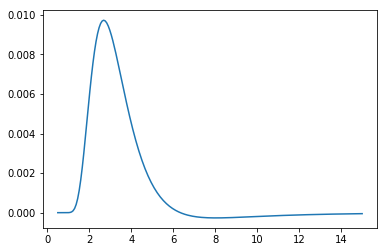

In [31]:
plt.plot(k, gamma)

In [32]:
k[np.argmax(gamma)]

2.685929648241206

In [33]:
data = np.loadtxt('results/run_L=327.7_Nel=3000_T=2000_dt=0.04_Np=1e7_nuh=6e-3_xi=8.62e-5_bc=False_k=none_p=2_CV=off_amp=none_rel=on.txt')

In [34]:
data.shape

(38205, 11)

In [36]:
tn = data[:, -1]
#bx = data[:, :64]

#bx = np.c_[bx, bx[:, 0]]

en_B = data[:, -4]

In [124]:
T   = 300
Nt  = int(T/0.04)
Nel = 64
Lz  = 10.

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

k = np.linspace(0, Nel, Nel + 1) - Nel/2
k = 2*np.pi/Lz*k

In [125]:
Bxkw = np.fft.fft2(bx)
K, W = np.meshgrid(k, w)
Bxkw = np.fft.fftshift(Bxkw)
Bxkw_plot = np.abs(Bxkw)

Text(0,0.5,'w')

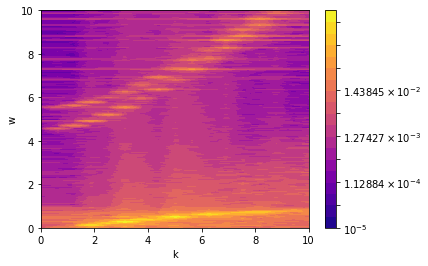

In [126]:
from matplotlib.colors import LogNorm

lvls = np.logspace(-5, 0, 20)
plt.contourf(K, W, Bxkw_plot/Bxkw_plot.max(), cmap = 'plasma', norm = LogNorm(), levels=lvls)

plt.xlim((0, 10))
plt.ylim((0, 10))

plt.colorbar()
plt.xlabel('k')
plt.ylabel('w')

In [12]:
omega1, gamma1, counter = fem.solveDispersionHybridRelativistic(140*2*np.pi/L, +1, 1., -1., wpe, wpa, wperp, nuh, 0.01, 1e-6, max_it=100)
#gamma2 = fem.solveDispersionHybridRelativistic(4*np.pi/10, +1, 1., -1., wpe, 0.2, 0.53, 6e-2, 0.01, 1e-6, max_it=100)[1]
#gamma3 = fem.solveDispersionHybridRelativistic(10*np.pi/10, +1, 1., -1., 2., 0.2, 0.53, 6e-2, 0.5, 1e-6, max_it=100)[1]

In [27]:
test = fem.solveDispersionHybrid(55*2*np.pi/L, +1, 1., -1., wpe, wpa, wperp, nuh, 0.01 + 0j, 1e-6)[0]

In [28]:
test

(0.23189283008682848+0.08889709395783314j)

In [13]:
gamma1

0.009724338724996881

(1e-07, 0.0001)

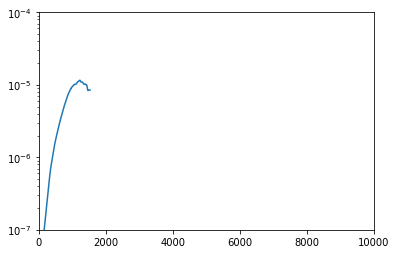

In [37]:
plt.semilogy(tn, en_B/L)
#plt.semilogy(tn, 1e-10*np.exp(2*gamma1*tn) + 1e-10*np.exp(2*gamma2*tn))
#plt.semilogy(tn, 1e-12*np.exp(2*gamma1*tn))
plt.xlim((0, 10000))
plt.ylim(1e-7, 1e-4)

In [38]:
B140 = data[:, 0]

1200.0
1520.0


(-0.025, 0.025)

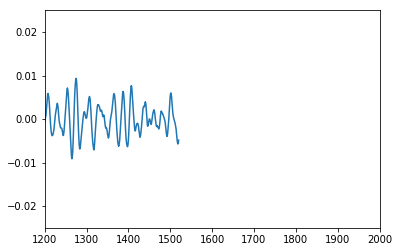

In [40]:
ta = 30000
tb = 38000


print(tn[ta])
print(tn[tb])

plt.plot(tn[ta:tb], B140[ta:tb])
plt.xlim((1200, 2000))
plt.ylim((-0.025, 0.025))

In [64]:
Bhat = np.fft.fft(B140[ta:tb + 1])
Bhat = np.fft.fftshift(Bhat)

In [65]:
Nt = tb - ta

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/(Nt*0.04)*w


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('spectrum_reflecting_draco.txt')

In [13]:
tn = data[:, -1]
bx = data[:, :128]

bx = np.c_[bx, bx[:, 0]]

In [16]:
Nt  = 6000
T   = Nt*0.05
Nel = 128
Lz  = 40.

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

k = np.linspace(0, Nel, Nel + 1) - Nel/2
k = 2*np.pi/Lz*k

In [19]:
Bxkw = np.fft.fft2(bx)
K, W = np.meshgrid(k, w)
Bxkw = np.fft.fftshift(Bxkw)
Bxkw_plot = np.abs(Bxkw)

Text(0,0.5,'w')

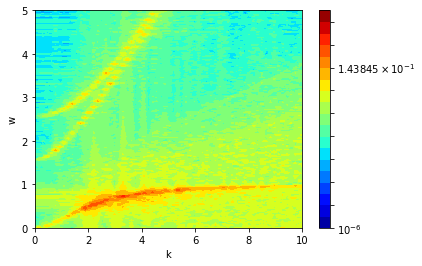

In [22]:
from matplotlib.colors import LogNorm

lvls = np.logspace(-6, 1, 20)
plt.contourf(K, W, Bxkw_plot/Bxkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels=lvls)

plt.xlim((0, 10))
plt.ylim((0, 5))

plt.colorbar()
plt.xlabel('k')
plt.ylabel('w')

In [3]:
tn = data[:, -1]
bx = data[:, :130]

In [4]:
Nt  = 6000
T   = Nt*0.05
Nel = 128
Lz  = 40.

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

k = np.linspace(0, Nel, Nel + 1) - Nel/2
k = 2*np.pi/Lz*k

In [5]:
Bxkw = np.fft.fft2(bx[:, 1:])
K, W = np.meshgrid(k, w)
Bxkw = np.fft.fftshift(Bxkw)
Bxkw_plot = np.abs(Bxkw)

Text(0,0.5,'w')

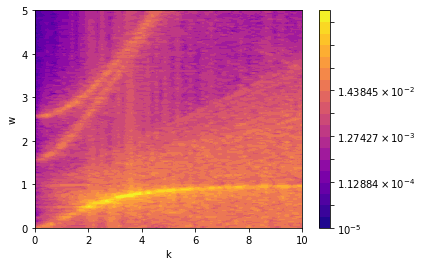

In [6]:
from matplotlib.colors import LogNorm

lvls = np.logspace(-5, 0, 20)
plt.contourf(K, W, Bxkw_plot/Bxkw_plot.max(), cmap = 'plasma', norm = LogNorm(), levels=lvls)

plt.xlim((0, 10))
plt.ylim((0, 5))

plt.colorbar()
plt.xlabel('k')
plt.ylabel('w')

# Impoved sampling strategy

In [384]:
Lz    = 327.7
xi    = 8.62e-5
nh0   = 6e-3
wpe   = 5.
wpa   = 0.2
wperp = 0.53

Ta = wperp**2/wpa**2 - 1.

B_background_z = lambda z : 1. + xi*(z - Lz/2)**2
nh = lambda z : nh0/(1 + Ta*(1 - 1/B_background_z(z)))

def g_sampling(z, kind):
    
    if kind == 'uniform':
        return 1/Lz
    
    elif kind == 'exact':
        return 1/Lz*1/(1 + Ta*(1 - 1/B_background_z(z)))
    
    elif kind == 'normal':
        sigma = 70.
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(z - Lz/2)**2/(2*sigma**2))
    
    elif kind == 'cauchy':
        gamma = 50.
        z0 = Lz/2
        return 1/(np.pi*gamma)*(gamma**2/((z - z0)**2 + gamma**2))

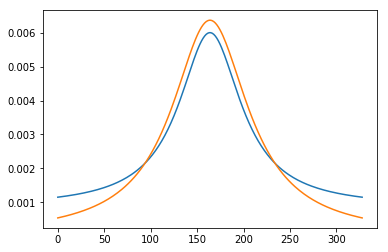

In [385]:
zplot = np.linspace(0., Lz, 200)

plt.plot(zplot, nh(zplot))
plt.plot(zplot, g_sampling(zplot, 'cauchy'))

In [398]:
from scipy.stats import cauchy

Np = int(5e5)
Nel = 300
dz = Lz/Nel
el_b = np.linspace(0., Lz, Nel + 1)

particles = np.zeros((Np, 2), dtype=float)

particles[:, 0] = sobol_seq.i4_sobol_generate(1, Np).flatten()*Lz
#particles[:, 0] = np.random.rand(Np)*Lz
#particles[:, 0] = np.random.randn(Np)*sigma + Lz/2
#particles[:, 0] = cauchy.rvs(loc=Lz/2, scale=50., size=Np)

particles[:, 1] = nh(particles[:, 0])/(g_sampling(particles[:, 0], 'uniform')*Np)

In [399]:
particles[:, 1]

array([3.93240000e-06, 1.22608279e-06, 1.22608279e-06, ...,
       3.65234622e-06, 7.86071208e-07, 8.01003044e-07])

In [400]:
bins = np.digitize(particles[:, 0], el_b) - 1

In [401]:
n_h = np.zeros(Nel, dtype=float)

for i in range(Nel):
    n_h[i] = sum(particles[bins == i, 1])/dz

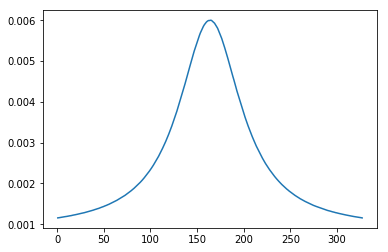

In [402]:
plt.plot(np.delete(el_b + dz/2, -1), n_h)
#plt.xlim((150., 180.))

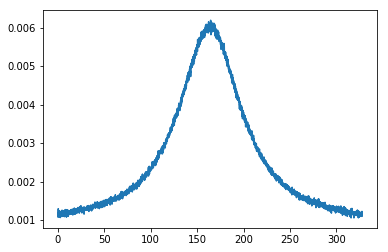

In [360]:
plt.plot(np.delete(el_b + dz/2, -1), n_h)

In [316]:
particles[:, 0].min()

-150.60622393992614

In [164]:
import scipy.integrate as integrate

In [172]:
N = integrate.quad(d, 0., Lz)

In [173]:
test = 1/(Ta + 1) + 2*Ta*np.arctan(np.sqrt(xi*(Ta + 1))*Lz/2)/(Lz*np.sqrt(xi)*(Ta + 1)**(3/2))

In [174]:
test

0.4248362697047011

In [177]:
C = Ta*np.arctan(np.sqrt(xi*(Ta + 1))*Lz/2)/(Lz*np.sqrt(xi)*(Ta + 1)**(3/2))

In [239]:
U = np.random.rand()
print(U)

0.22040986605193402


In [240]:
F = lambda z : Lz*(Ta + 1)*U*test - Lz*(Ta + 1)*C - Ta*np.arctan(np.sqrt(xi*(Ta + 1))*(z - Lz/2))/np.sqrt(xi*(Ta + 1))

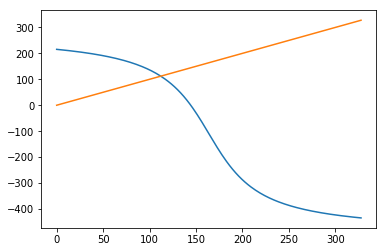

In [241]:
plt.plot(zplot, F(zplot))
plt.plot(zplot, zplot)

In [251]:
F(112.)

112.26624304130755

In [252]:
value = 112.

for i in range(40):
    print(value)
    value = F(value)

112.0
112.26624304130755
111.65401942192429
113.05602676979132
109.81479203100704
117.14706446830328
99.70632082701795
136.7551033158406
34.43077320142737
200.5190736581934
-289.17060333441265
253.10268612318612
-389.3954732521421
257.05477406944345
-393.3385873981001
257.18135721078113
-393.4602552340218
257.1852346951972
-393.4639777745754
257.18535330388715
-393.4640916395767
257.18535693186266
-393.4640951224495
257.1853570428342
-393.46409522898267
257.1853570462286
-393.46409523224133
257.1853570463324
-393.4640952323409
257.1853570463356
-393.464095232344
257.18535704633575
-393.46409523234416
257.18535704633575
-393.46409523234416
257.18535704633575
-393.46409523234416
257.18535704633575
-393.46409523234416
257.18535704633575


In [372]:
import sobol_seq

In [391]:
test = sobol_seq.i4_sobol_generate(2, 100000)

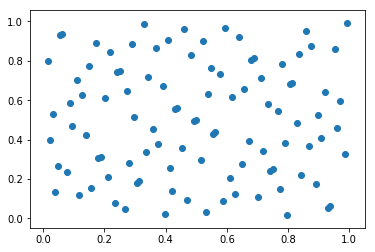

In [380]:
plt.scatter(test[:, 0], test[:, 1])

In [381]:
test = np.random.rand(2, 100)

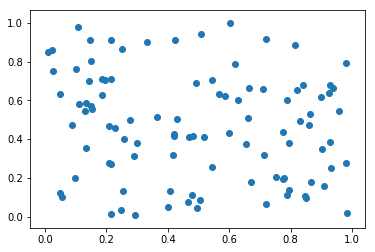

In [383]:
plt.scatter(test[0], test[1])

In [431]:
R = np.random.rand(100000)

In [432]:
import scipy.special as sp

In [433]:
test = sp.erfinv(2*R - 1)

In [434]:
bins = np.linspace(-4., 4., 4*8 + 1)

In [27]:
plt.hist(test, bins=bins)

NameError: name 'test' is not defined